In [165]:
import pandas as pd
import numpy as np

In [166]:
df= pd.read_csv("Data\HARGA RUMAH BADUNG RUMAH 123.csv")

In [167]:
df.columns

Index(['HARGA', 'LT', 'LB', 'JKT', 'JKM', 'GRS', 'KOTA'], dtype='object')

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   object
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.9+ KB


In [169]:
df

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,"28,000,000,000",1100,700,5,6,ADA,BADUNG
1,"19,000,000,000",824,800,4,4,ADA,BADUNG
2,"4,700,000,000",500,400,4,3,ADA,BADUNG
3,"4,900,000,000",251,300,5,4,ADA,BADUNG
4,"28,000,000,000",1340,575,4,5,ADA,BADUNG
...,...,...,...,...,...,...,...
996,"16,000,000,000",488,550,6,5,ADA,BADUNG
997,"4,500,000,000",209,270,4,4,ADA,BADUNG
998,"29,000,000,000",692,400,4,3,TIDAK ADA,BADUNG
999,"1,700,000,000",102,140,4,3,TIDAK ADA,BADUNG


In [170]:
df.loc[(df["GRS"]=="ADA"),["GRS"]]=1
df.loc[(df["GRS"]=="TIDAK ADA"),["GRS"]]=0

In [171]:
df.loc[(df["GRS"]==0),["GRS"]]

,GRS
8,0
9,0
29,0
66,0
80,0
...,...
984,0
992,0
998,0
999,0


In [172]:
df.describe()

,LT,LB,JKT,JKM
count,1001.000000,1001.000000,1001.000000,1001.000000
mean,530.504496,487.275724,4.457542,3.940060
std,531.069773,452.872262,2.004606,1.903261
min,22.000000,38.000000,1.000000,1.000000
25%,220.000000,300.000000,4.000000,3.000000
50%,400.000000,411.000000,4.000000,4.000000
75%,677.000000,600.000000,5.000000,4.000000
max,6790.000000,10000.000000,27.000000,27.000000


jika diliat pada 
- LT bahwa memiliki nilai STD > MEAN yang mana berarti sebuah field memiliki nilai yang condong terhadap penyebaran data dari mean

- di field lainnya memiliki value yang STD < MEAN yang berarti sebuah field memilii niali yang condong terhadap penyebaran data dari mean



In [173]:
# evaluation the info about the df 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   object
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(4), object(3)
memory usage: 54.9+ KB


Thats data have analisis:

-> 3 data categorical 

-> Non missing value

In [174]:
# Cleaning data by per issue
backup = df.copy()

In [175]:
# convert GRS to numerical value
df["GRS"] = df["GRS"].astype(np.int64)

In [176]:
# convert to Harga to numerical value
df["HARGA"]= df["HARGA"].str.replace(',','').astype(np.longlong)

In [177]:
# Analisis the Kota filed
df['KOTA'].unique()
# only have one value

array(['BADUNG'], dtype=object)

In [178]:
# extracting the traing data
X = df[["LT","LB","JKT","JKM","GRS","KOTA"]]
y = df["HARGA"] 

In [179]:
# explain the extracting data
X

,LT,LB,JKT,JKM,GRS,KOTA
0,1100,700,5,6,1,BADUNG
1,824,800,4,4,1,BADUNG
2,500,400,4,3,1,BADUNG
3,251,300,5,4,1,BADUNG
4,1340,575,4,5,1,BADUNG
...,...,...,...,...,...,...
996,488,550,6,5,1,BADUNG
997,209,270,4,4,1,BADUNG
998,692,400,4,3,0,BADUNG
999,102,140,4,3,0,BADUNG


In [180]:
y

0       28000000000
1       19000000000
2        4700000000
3        4900000000
4       28000000000
           ...     
996     16000000000
997      4500000000
998     29000000000
999      1700000000
1000     1250000000
Name: HARGA, Length: 1001, dtype: int64

yg penting shapenya itu sama karena pada train yang mana data train x dengan train y harus punya bobot yang sama ataupun pada data testing

In [181]:
df

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,1,BADUNG
1,19000000000,824,800,4,4,1,BADUNG
2,4700000000,500,400,4,3,1,BADUNG
3,4900000000,251,300,5,4,1,BADUNG
4,28000000000,1340,575,4,5,1,BADUNG
...,...,...,...,...,...,...,...
996,16000000000,488,550,6,5,1,BADUNG
997,4500000000,209,270,4,4,1,BADUNG
998,29000000000,692,400,4,3,0,BADUNG
999,1700000000,102,140,4,3,0,BADUNG


# Cleaned Data

In [182]:
# convert the clan data to the csv
df.to_csv("Data/Cleaned_House_Data.csv",index=False)

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   int64 
 6   KOTA    1001 non-null   object
dtypes: int64(6), object(1)
memory usage: 54.9+ KB


In [184]:
df.describe(include='all')

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001
unique,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,BADUNG
freq,NaN,NaN,NaN,NaN,NaN,NaN,1001
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060,0.778222,NaN
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261,0.415650,NaN
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000,0.000000,NaN
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000,1.000000,NaN
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000,1.000000,NaN
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000,1.000000,NaN


In [185]:
corelations=df.corr()
corelations["HARGA"].sort_values(ascending=False)

HARGA    1.000000
LT       0.740467
LB       0.651660
JKM      0.231875
JKT      0.217737
GRS      0.096788
Name: HARGA, dtype: float64

<AxesSubplot:>

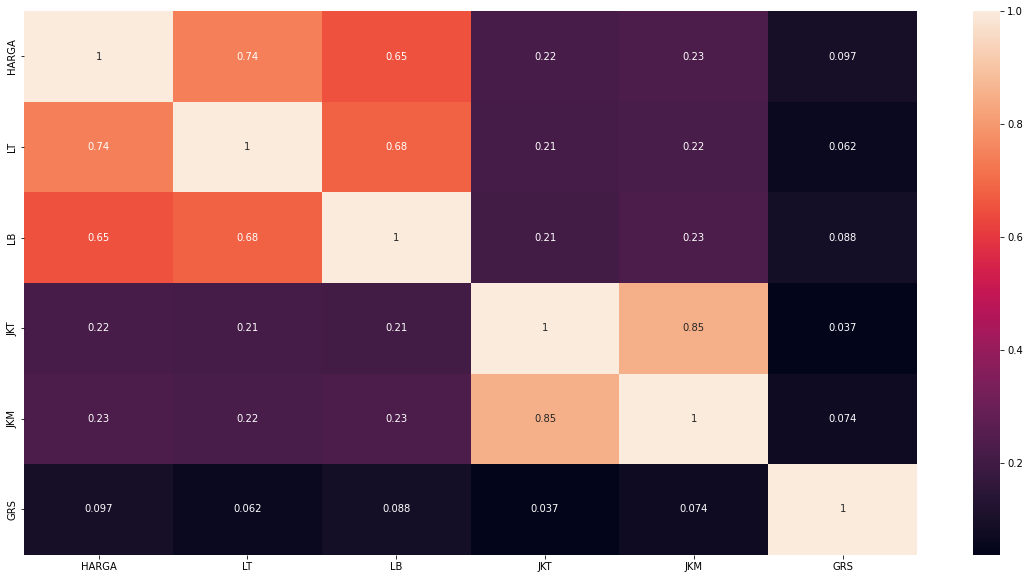

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(corelations,annot=True)

Korelasi dari sebuah GRS, JKM, JKT sangat buruk dalam penentuan harga sebuah rumah maka dikarenakan sebuah valuenya mendekati 0 maka dari itu akan di drop

In [187]:
df = df.drop(columns=['JKT','JKM','GRS'],axis=1)
df

,HARGA,LT,LB,KOTA
0,28000000000,1100,700,BADUNG
1,19000000000,824,800,BADUNG
2,4700000000,500,400,BADUNG
3,4900000000,251,300,BADUNG
4,28000000000,1340,575,BADUNG
...,...,...,...,...
996,16000000000,488,550,BADUNG
997,4500000000,209,270,BADUNG
998,29000000000,692,400,BADUNG
999,1700000000,102,140,BADUNG


In [188]:
# transform the kota data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
ohe = OneHotEncoder(sparse='False',handle_unknown='ignore')
df['KOTA']=ohe.fit_transform(df['KOTA'].values.reshape(-1,1)).toarray()

In [189]:
df

,HARGA,LT,LB,KOTA
0,28000000000,1100,700,1.0
1,19000000000,824,800,1.0
2,4700000000,500,400,1.0
3,4900000000,251,300,1.0
4,28000000000,1340,575,1.0
...,...,...,...,...
996,16000000000,488,550,1.0
997,4500000000,209,270,1.0
998,29000000000,692,400,1.0
999,1700000000,102,140,1.0


<AxesSubplot:>

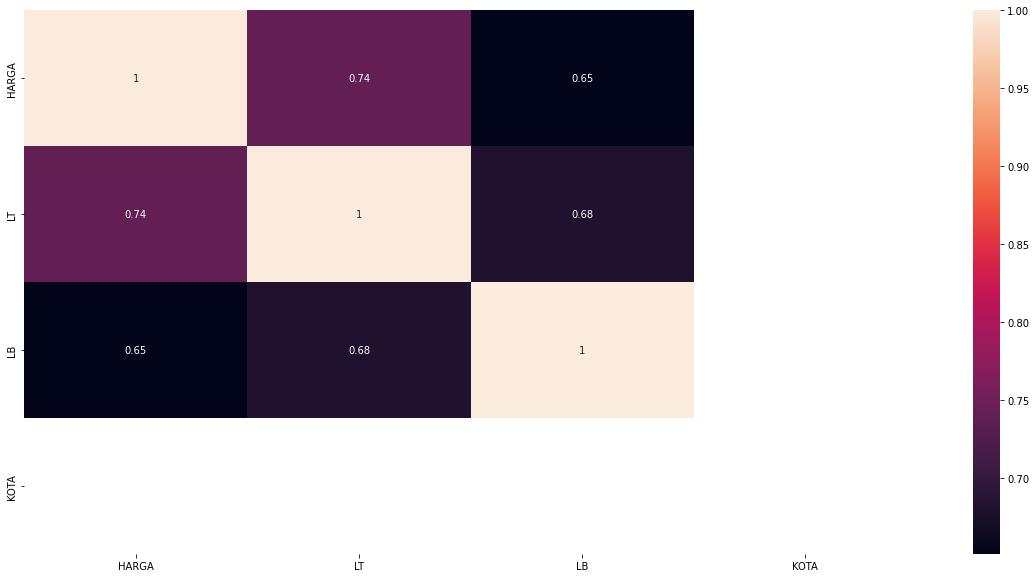

In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [191]:
corelations =df.corr()
corelations['HARGA'].sort_values(ascending=False)

HARGA    1.000000
LT       0.740467
LB       0.651660
KOTA          NaN
Name: HARGA, dtype: float64

In [192]:
# omg its be slain too
df = df.drop(columns='KOTA',axis=1)
df

,HARGA,LT,LB
0,28000000000,1100,700
1,19000000000,824,800
2,4700000000,500,400
3,4900000000,251,300
4,28000000000,1340,575
...,...,...,...
996,16000000000,488,550
997,4500000000,209,270
998,29000000000,692,400
999,1700000000,102,140


In [226]:
# split the data to train and validation data
X = df.drop(["HARGA"],axis=1).copy()
y = df["HARGA"].copy()
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)


In [227]:
print(X_train.shape)
print(y_train.shape)

(800, 2)
(800,)


In [228]:
print(X_test.shape)
print(y_test.shape)

(201, 2)
(201,)


Alright the data gone be balance

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score # to know score accuracy like r1 score if use the classification
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [230]:
y_pred = model.predict(X_test)
y_pred

array([1.45743757e+10, 9.07558984e+09, 5.50696012e+09, 1.31444488e+10,
       1.71242983e+10, 8.91069913e+09, 2.24770607e+10, 3.25102621e+09,
       1.57981342e+10, 3.94294863e+09, 5.76101834e+09, 1.85971525e+10,
       8.87296464e+09, 7.20132946e+10, 4.77451267e+09, 2.30887578e+10,
       1.76892227e+10, 1.91037155e+10, 1.63038965e+10, 1.23534097e+10,
       3.85295637e+09, 1.50054697e+10, 8.61430823e+09, 2.94934116e+10,
       9.44905118e+09, 3.97916242e+10, 9.00446483e+09, 1.79407926e+10,
       4.72225560e+10, 1.92157779e+10, 1.85880041e+10, 2.30549069e+10,
       2.44037597e+10, 1.86561324e+10, 2.22643043e+10, 1.34400389e+10,
       1.61775410e+10, 6.25667336e+09, 8.84574976e+09, 2.81478749e+09,
       4.67068446e+10, 6.23266141e+09, 1.72452789e+10, 8.77483094e+09,
       6.15042224e+09, 1.76229020e+10, 2.13643817e+10, 1.87858250e+10,
       1.64138970e+10, 4.77391813e+09, 1.66749556e+10, 1.34308906e+10,
       1.42278990e+10, 1.76892227e+10, 1.72284015e+10, 1.93615712e+10,
      

In [231]:
y_test.values

array([ 17900000000,   8000000000,   5900000000,  17500000000,
        19750000000,   7300000000,  25000000000,   3000000000,
        15000000000,   1930000000,   5800000000,  26000000000,
         8500000000,  55000000000,   4300000000,  85000000000,
        13000000000,  18000000000,   4500000000,   6800000000,
         3250000000,   9000000000,   8500000000,  43000000000,
         9000000000,  85000000000,   5000000000,  28000000000,
        55000000000,  14500000000,  16000000000,  20000000000,
        20000000000,  23000000000,  27000000000,   8000000000,
         3700000000,  10000000000,   9500000000,   1300000000,
        55000000000,   1700000000,  17640000000,   9550000000,
         4000000000,  20000000000,  60000000000,  10500000000,
        22000000000,   2400000000,  17500000000,  19000000000,
        17000000000,  14000000000,  19000000000,   9900000000,
         7000000000,  47000000000,  10500000000,  26500000000,
         1700000000,   5300000000,  37500000000,  35500

In [232]:
# omg we have problem to miss the predict hemmm be coreect will check
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.45035492755707895

so bad values

But this can be batch gradient descant to use the change SVD algorithm

In [235]:
scores=[]
for i in range(10000):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i)
    model = LinearRegression()
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    scores.append(r2_score(y_test,y_pred))
np.argmax(scores)

262

we have the maximum value r2 scores on the random state 262, will be make the value constant my friends

In [236]:
scores[np.argmax(scores)]

0.8553685207115741

In [243]:
import pickle
pickle
pickle.dump(model,open('LinearRegressionModel.pkl','wb'))